In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns; sns.set()

%matplotlib inline

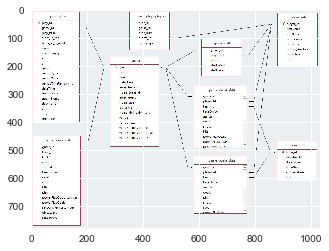

In [31]:
#Display the table relationship diagram
img=mpimg.imread('data/table_relationships.JPG')
imgplot = plt.imshow(img)
plt.show()

In [32]:
#Read in all CSV files from repository
game = pd.read_csv('data/game.csv')
game_goalie_stats = pd.read_csv('data/game_goalie_stats.csv')
game_plays = pd.read_csv('data/game_plays.csv')
game_plays_players = pd.read_csv('data/game_plays_players.csv')
game_shifts = pd.read_csv('data/game_shifts.csv')
game_skater_stats = pd.read_csv('data/game_skater_stats.csv')
game_teams_stats = pd.read_csv('data/game_teams_stats.csv')
player_info = pd.read_csv('data/player_info.csv')
team_info = pd.read_csv('data/team_info.csv')

In [33]:
#create dataframe of goalie with team name and player name
goalie_team = pd.merge(game_goalie_stats, team_info, on = 'team_id')
goalie_team = pd.merge(goalie_team, player_info, on = 'player_id')
#create dataframe of player with team name and player name
skater_team = pd.merge(game_skater_stats, team_info, on = 'team_id')
skater_team = pd.merge(skater_team, player_info, on = 'player_id')

In [34]:
skater_team.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'franchiseId', 'shortName', 'teamName', 'abbreviation', 'link_x',
       'firstName', 'lastName', 'nationality', 'birthCity', 'primaryPosition',
       'birthDate', 'link_y'],
      dtype='object')

In [35]:
game_plays.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side'],
      dtype='object')

In [36]:
game_plays.describe()

,game_id,play_num,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
count,2.369646e+06,2.369646e+06,1.907922e+06,1.907922e+06,1.903140e+06,1.903157e+06,2.369646e+06,2.369646e+06,2.369646e+06,2.369646e+06,2.369646e+06,1.903140e+06,1.903157e+06
mean,2.014707e+09,1.648367e+02,1.762862e+01,1.755894e+01,2.861891e-01,-2.097951e-01,2.026005e+00,5.857356e+02,5.979063e+02,1.194952e+00,1.322649e+00,8.497122e+00,1.519691e-01
std,1.635618e+06,9.749416e+01,1.229775e+01,1.228052e+01,6.428901e+01,2.307910e+01,8.716109e-01,3.659118e+02,3.639756e+02,1.285669e+00,1.379465e+00,6.372565e+01,2.307955e+01
min,2.012020e+09,1.000000e+00,1.000000e+00,1.000000e+00,-9.900000e+01,-4.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-4.200000e+01
25%,2.013021e+09,8.200000e+01,8.000000e+00,8.000000e+00,-6.900000e+01,-2.200000e+01,1.000000e+00,2.650000e+02,2.820000e+02,0.000000e+00,0.000000e+00,-6.300000e+01,-2.200000e+01
50%,2.015020e+09,1.630000e+02,1.600000e+01,1.600000e+01,0.000000e+00,0.000000e+00,2.000000e+00,5.790000e+02,5.980000e+02,1.000000e+00,1.000000e+00,3.000000e+01,0.000000e+00
75%,2.016021e+09,2.440000e+02,2.400000e+01,2.400000e+01,6.900000e+01,2.200000e+01,3.000000e+00,9.030000e+02,9.140000e+02,2.000000e+00,2.000000e+00,6.900000e+01,2.200000e+01
max,2.017030e+09,6.810000e+02,5.400000e+01,5.400000e+01,9.900000e+01,4.200000e+01,6.000000e+00,1.200000e+03,1.200000e+03,9.000000e+00,1.000000e+01,9.900000e+01,4.200000e+01


In [37]:
#merge the game home_team_id to the game_plays
game_plays = pd.merge(game_plays, game, on = 'game_id')

In [38]:
#My computer cannot process this command - Out of Memory Error
#game_plays = pd.merge(game_plays, game_plays_players, on = 'play_num', how = 'outer')

In [39]:
#Remove nan x positions
game_plays_position = game_plays[np.isfinite(game_plays['x'])]

#Convert a column to a datetime object
game_plays_position['dateTime'] = pd.to_datetime(game_plays_position['dateTime'])
#Create column of years from datetime Series
game_plays_position['year'] = game_plays_position['dateTime'].dt.year

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [40]:
game_plays_position.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,year
1,2013020652_61,2013020652,61,27.0,20.0,Giveaway,NaN,58.0,39.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
5,2013020652_4,2013020652,4,27.0,20.0,Faceoff,NaN,0.0,0.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
6,2013020652_5,2013020652,5,27.0,20.0,Hit,NaN,90.0,-39.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
7,2013020652_6,2013020652,6,20.0,27.0,Shot,Backhand,-78.0,9.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
8,2013020652_7,2013020652,7,20.0,27.0,Shot,Slap Shot,-39.0,-31.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014


In [41]:
#Free up some memory
del game_shifts
del game_plays
del game_plays_players

In [42]:
#lets only look at hits
game_plays_goals = game_plays_position[game_plays_position['event'] == 'Goal'] 
game_plays_hits = game_plays_position[game_plays_position['event'] == 'Hit']

In [43]:
game_plays_goals.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz',
       'year'],
      dtype='object')

In [44]:
game_plays_goals.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,year
122,2013020652_123,2013020652,123,27.0,20.0,Goal,Wrist Shot,-96.0,-9.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
129,2013020652_130,2013020652,130,27.0,20.0,Goal,Wrist Shot,-71.0,8.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
179,2013020652_180,2013020652,180,27.0,20.0,Goal,Wrist Shot,-72.0,-24.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
261,2013020652_262,2013020652,262,27.0,20.0,Goal,Wrist Shot,80.0,3.0,3,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
307,2013020652_308,2013020652,308,27.0,20.0,Goal,Slap Shot,51.0,-21.0,3,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014


In [45]:
#Seems like there is some issue with data type per some reading online.  Needs to be float not an object
cols = ['x', 'y']
game_plays_position[cols] = game_plays_position[cols].astype(float)

In [46]:
game_plays_position.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,year
1,2013020652_61,2013020652,61,27.0,20.0,Giveaway,NaN,58.0,39.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
5,2013020652_4,2013020652,4,27.0,20.0,Faceoff,NaN,0.0,0.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
6,2013020652_5,2013020652,5,27.0,20.0,Hit,NaN,90.0,-39.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
7,2013020652_6,2013020652,6,20.0,27.0,Shot,Backhand,-78.0,9.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
8,2013020652_7,2013020652,7,20.0,27.0,Shot,Slap Shot,-39.0,-31.0,1,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014


# Create home goals vs away goals by team

In [47]:
game_plays_position.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz',
       'year'],
      dtype='object')

In [48]:
#By season, by game_id
season_scores = game_plays_position.groupby(['year', 'game_id'])[['goals_home', 'goals_away']].max()
season_scores.groupby('year')[['goals_home', 'goals_away']].mean()

,goals_home,goals_away
year,,
2013,2.802888,2.476534
2014,2.830806,2.525140
2015,2.740941,2.516577
2016,2.803089,2.548263
2017,2.944694,2.646487
2018,3.068365,2.843164


In [49]:
import re

In [50]:
# #Goals by Sidney Crosby Only
# crosby_goals = game_plays_goals[game_plays_goals['description'].str.contains("Crosby", na=False)]

# #Let's look at where all the Goals have occurred on the ice during regular game play time only (periods 1 - 3)
# reg_time_crosby = crosby_goals[crosby_goals['period'] <=3]
# crosby_ot_goals = crosby_goals[crosby_goals['period'] > 3]

# #Goals by Crosby at home vs away
# reg_time_crosby_home = reg_time_crosby[reg_time_crosby['home_team_id']==reg_time_crosby['team_id_for']]
# reg_time_crosby_away = reg_time_crosby[reg_time_crosby['away_team_id']==reg_time_crosby['team_id_for']]

# #How about goals?
# sns.set(style = 'white')
# sns.jointplot('x', 'y', data=reg_time_crosby_home, kind="hex")
# sns.jointplot('x', 'y', data=reg_time_crosby_away, kind="hex")
# sns.jointplot('x', 'y', data=crosby_ot_goals, kind="hex")

# #sns.kdeplot(reg_time_crosby_home['x'], reg_time_crosby_home['y'], kind='hex')
# #sns.kdeplot(reg_time_crosby_away['x'], reg_time_crosby_away['y'])



# #sns.kdeplot(crosby_ot_goals['x'], crosby_ot_goals['y'])

# #This took forever to run on my computer but eventually showed up!

# #g = sns.FacetGrid(reg_time_crosby, col = "year", row = 'period', margin_titles=True)
# #g.map(sns.kdeplot, 'x', 'y')

# #plt.subplots_adjust(top=0.9)
# #g.fig.suptitle('Player Position When Scoring Regular time')


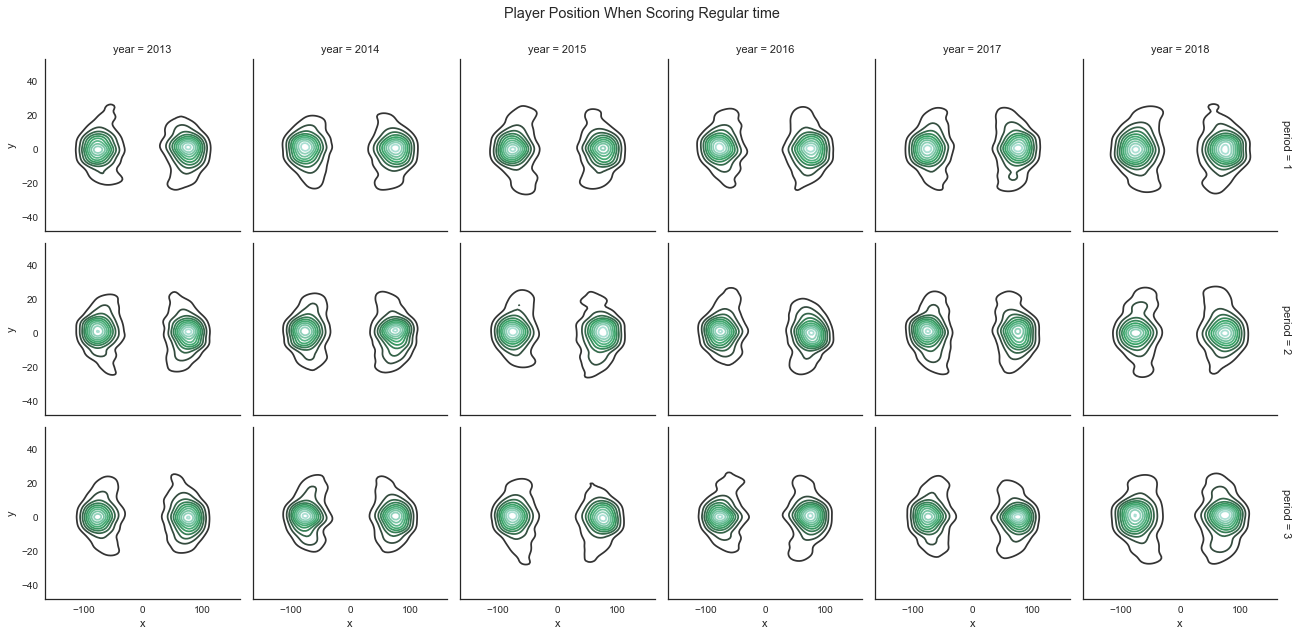

In [51]:
#Let's look at where all the Goals have occurred on the ice during regular game play time only (periods 1 - 3)
reg_time = game_plays_goals[game_plays_goals['period'] <=3]

#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
g = sns.FacetGrid(reg_time, col = "year", row = 'period', margin_titles=True)
g.map(sns.kdeplot, 'x', 'y')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Player Position When Scoring Regular time')

#We can iterate through the various subplots to change labels and titles if we want

#axes = g.axes.flatten()
#axes[1].set_title('Player Position When Scoring Regular time')
#axes[1].set_ylabel('Y coordinate')
#axes[1].set_xlabel('X coordinate')

# It will be necessary to figure out how to identify the scoring team for each play.  I think thats in the gameshifts table and we can join on home team with the list of players scoring or with a regex expression

In [94]:
#Add team name to scoring team goals
goals_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='team_id_for', right_on='team_id')

#Only keep the max number of goals (game ending scores)
goals_by_team = goals_by_team.groupby(['teamName','game_id']).max()

#Look at mean goal differential as well as plus 1 standard deviation and minus 1 standard deviation
goals_by_team_summarized = goals_by_team.groupby('teamName').agg({'goals_home':['std','mean'],
                                                                   'goals_away':['std','mean']})
goals_by_team_summarized['goal_differential'] = goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_away']['mean']

goals_by_team_summarized['goal_differential_p1std'] = (goals_by_team_summarized['goals_home']['mean'] + goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] + goals_by_team_summarized['goals_away']['std'])

goals_by_team_summarized['goal_differential_m1std'] = (goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] - goals_by_team_summarized['goals_away']['std'])

#Sort by goal differential
goals_by_team_summarized = goals_by_team_summarized.sort_values('goal_differential', ascending=False)
goals_by_team_summarized = goals_by_team_summarized[['goal_differential_m1std','goal_differential','goal_differential_p1std']]

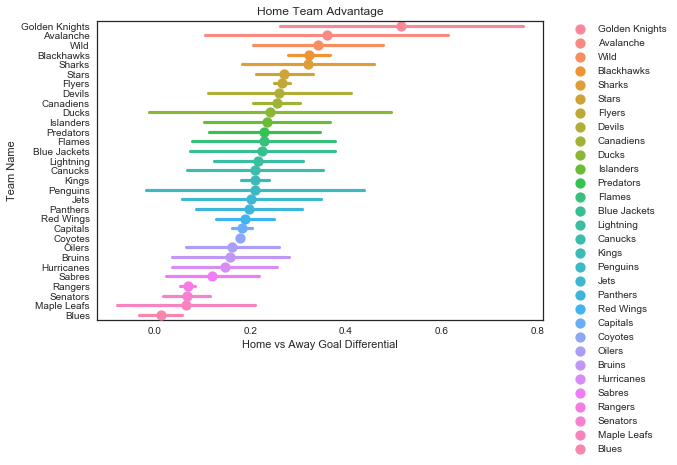

In [177]:
#Create the long version dataframe to see a line for each team
df = goals_by_team_summarized.reset_index()
df_long = df.melt(id_vars=['teamName'], var_name='goal_differential')

#Create a plot of team & goal differentials
sns.set(style = 'white')
ax = sns.pointplot(x="value", y="teamName", hue = "teamName", data=df_long, join=False)
ax.set(xlabel='Home vs Away Goal Differential', ylabel='Team Name', title = 'Home Team Advantage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

pass

# What if we look for advantage by year?

In [222]:
#Add team name to scoring team goals
goals_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='team_id_for', right_on='team_id')

#Only keep the max number of goals (game ending scores)
goals_by_team = goals_by_team.groupby(['teamName','game_id']).max()

#Look at mean goal differential as well as plus 1 standard deviation and minus 1 standard deviation
goals_by_team_summarized = goals_by_team.groupby(['teamName','year']).agg({'goals_home':['std','mean'],
                                                                   'goals_away':['std','mean']})

goals_by_team_summarized['goal_differential'] = goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_away']['mean']

goals_by_team_summarized['goal_differential_p1std'] = (goals_by_team_summarized['goals_home']['mean'] + goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] + goals_by_team_summarized['goals_away']['std'])

goals_by_team_summarized['goal_differential_m1std'] = (goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] - goals_by_team_summarized['goals_away']['std'])

#Sort by goal differential
goals_by_team_summarized = goals_by_team_summarized.sort_values('goal_differential', ascending=False)
goals_by_team_summarized = goals_by_team_summarized[['goal_differential_m1std','goal_differential','goal_differential_p1std']]

In [224]:
#Create the long version dataframe to see a line for each team
df = goals_by_team_summarized.reset_index()
df_long = df.melt(id_vars=['teamName','year'], var_name='var_name')

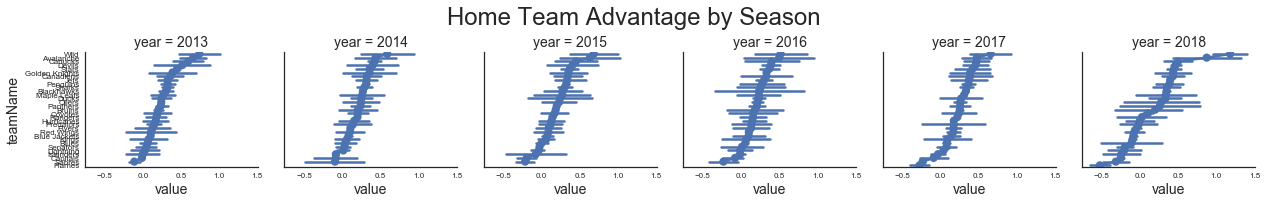

In [276]:
sns.set(style = 'white')
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":14}) 
g = sns.FacetGrid(df_long, col = "year", margin_titles=True)
g.map(sns.pointplot, 'value', 'teamName')
plt.subplots_adjust(top=0.77)
g.fig.suptitle('Home Team Advantage by Season')

pass

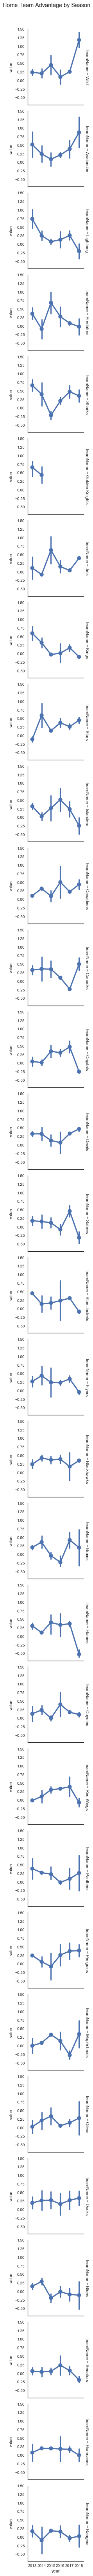

In [249]:
sns.set(style = 'white')
g = sns.FacetGrid(df_long, row = "teamName", margin_titles=True)
g.map(sns.pointplot, 'year', 'value')
plt.subplots_adjust(top=0.97)
g.fig.suptitle('Home Team Advantage by Season')
pass

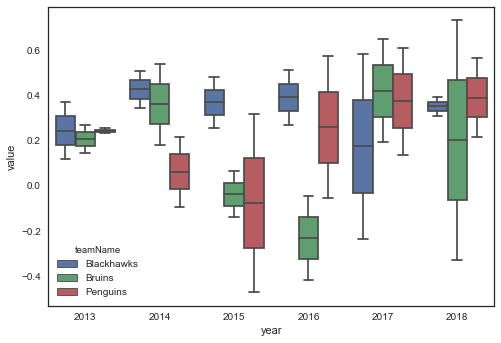

In [248]:
#Penguins Advantage by Year
sns.boxplot(x="year", y="value",
            hue="teamName",
            data=df_long[(df_long['teamName']=='Penguins') | (df_long['teamName']=='Bruins') | (df_long['teamName']=='Blackhawks')])
pass

# How does the advantage work out when we examine different venues

In [300]:
#We will now look at differences in time zones
venue_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='home_team_id', right_on='team_id')

#Add in the venue of the away team as well
goals_by_team = pd.merge(game_plays_goals, team_info, how='inner', left_on='away_team_id', right_on='team_id')


In [301]:
#Find the venue for each team
venue_by_team = venue_by_team.groupby(['teamName','venue_time_zone_offset']).sum().reset_index()[['teamName','venue_time_zone_offset']]

In [302]:
goals_by_team = pd.merge(goals_by_team, venue_by_team, left_on='teamName', right_on='teamName')

In [304]:
goals_by_team['timezone_diff'] = goals_by_team['venue_time_zone_offset_x'] - goals_by_team['venue_time_zone_offset_y']

In [305]:
#Only keep the max number of goals (game ending scores)
goals_by_team = goals_by_team.groupby(['teamName','game_id']).max()

#Look at mean goal differential as well as plus 1 standard deviation and minus 1 standard deviation
goals_by_team_summarized = goals_by_team.groupby(['timezone_diff','year']).agg({'goals_home':['std','mean'],
                                                                   'goals_away':['std','mean']})

goals_by_team_summarized['goal_differential'] = goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_away']['mean']

goals_by_team_summarized['goal_differential_p1std'] = (goals_by_team_summarized['goals_home']['mean'] + goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] + goals_by_team_summarized['goals_away']['std'])

goals_by_team_summarized['goal_differential_m1std'] = (goals_by_team_summarized['goals_home']['mean'] - goals_by_team_summarized['goals_home']['std']) - \
    (goals_by_team_summarized['goals_away']['mean'] - goals_by_team_summarized['goals_away']['std'])

#Sort by goal differential
goals_by_team_summarized = goals_by_team_summarized.sort_values('goal_differential', ascending=False)
goals_by_team_summarized = goals_by_team_summarized[['goal_differential_m1std','goal_differential','goal_differential_p1std']]

In [307]:
#Create the long version dataframe to see a line for each team
df = goals_by_team_summarized.reset_index()
df_long = df.melt(id_vars=['timezone_diff','year'], var_name='var_name')

In [308]:
df

,timezone_diff,year,goal_differential_m1std,goal_differential,goal_differential_p1std
,,,,,
0,-3,2013,0.620736,1.145455,1.670173
1,2,2015,0.580013,0.877551,1.175089
2,-1,2018,0.581928,0.725275,0.868622
3,2,2016,0.094131,0.611111,1.128091
4,-1,2013,0.365301,0.609195,0.853089
5,2,2017,0.439139,0.557692,0.676246
6,-1,2015,0.404186,0.552941,0.701696
7,-3,2018,0.300054,0.550000,0.799946
8,-1,2014,0.379902,0.506494,0.633085


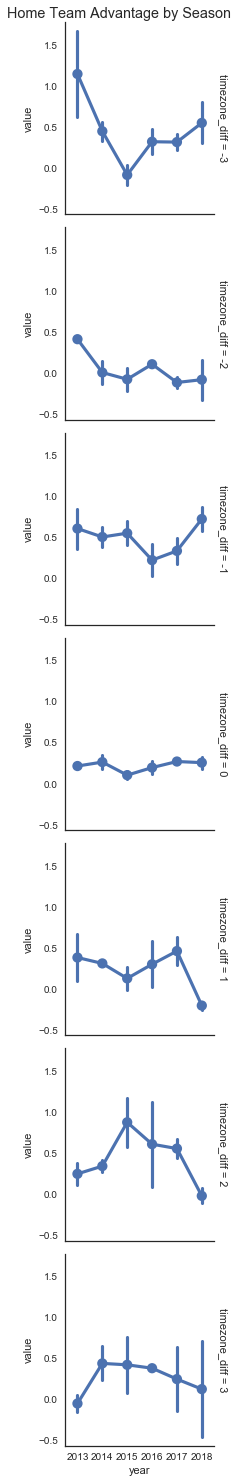

In [310]:
sns.set(style = 'white')
g = sns.FacetGrid(df_long, row = "timezone_diff", margin_titles=True)
g.map(sns.pointplot, 'year', 'value')
plt.subplots_adjust(top=0.97)
g.fig.suptitle('Home Team Advantage by Season')
pass

In [253]:
goals_by_team.columns

Index(['abbreviation', 'away_goals', 'away_team_id', 'dateTime', 'date_time',
       'description', 'event', 'franchiseId', 'goals_away', 'goals_home',
       'home_goals', 'home_rink_side_start', 'home_team_id', 'link', 'outcome',
       'period', 'periodTime', 'periodTimeRemaining', 'periodType', 'play_id',
       'play_num', 'season', 'shortName', 'st_x', 'st_y', 'team_id',
       'team_id_against', 'team_id_for', 'type', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz',
       'x', 'y', 'year'],
      dtype='object')

In [78]:
home_goals_by_team = goals_by_team[goals_by_team['home_team_id']==goals_by_team['team_id_for']]
away_game_plays_goals = goals_by_team[goals_by_team['away_team_id']==goals_by_team['team_id_for']]

In [54]:
#Split into home and away goals
home_game_plays_goals = game_plays_goals[game_plays_goals['home_team_id']==game_plays_goals['team_id_for']]
away_game_plays_goals = game_plays_goals[game_plays_goals['away_team_id']==game_plays_goals['team_id_for']]

In [56]:
home_game_plays_goals.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,year
122,2013020652_123,2013020652,123,27.0,20.0,Goal,Wrist Shot,-96.0,-9.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
129,2013020652_130,2013020652,130,27.0,20.0,Goal,Wrist Shot,-71.0,8.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
179,2013020652_180,2013020652,180,27.0,20.0,Goal,Wrist Shot,-72.0,-24.0,2,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
261,2013020652_262,2013020652,262,27.0,20.0,Goal,Wrist Shot,80.0,3.0,3,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014
307,2013020652_308,2013020652,308,27.0,20.0,Goal,Slap Shot,51.0,-21.0,3,...,0,6,home win REG,NaN,Jobing.com Arena,/api/v1/venues/null,America/Phoenix,-7,MST,2014


In [55]:
home_game_plays_goals.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz',
       'year'],
      dtype='object')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


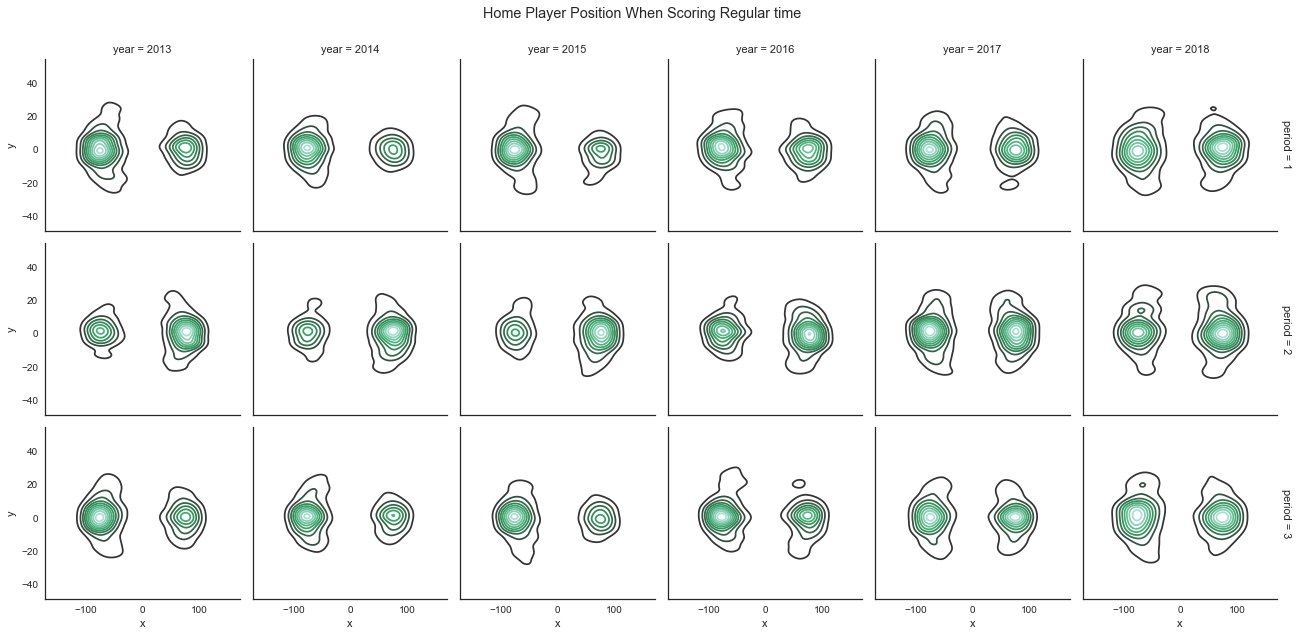

In [25]:
#Let's look at where all the Goals have occurred on the ice FOR HOME TEAM
home_reg_time = home_game_plays_goals[game_plays_goals['period'] <=3]

#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
g = sns.FacetGrid(home_reg_time, col = "year", row = 'period', margin_titles=True)
g.map(sns.kdeplot, 'x', 'y')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Home Player Position When Scoring Regular time')
pass

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


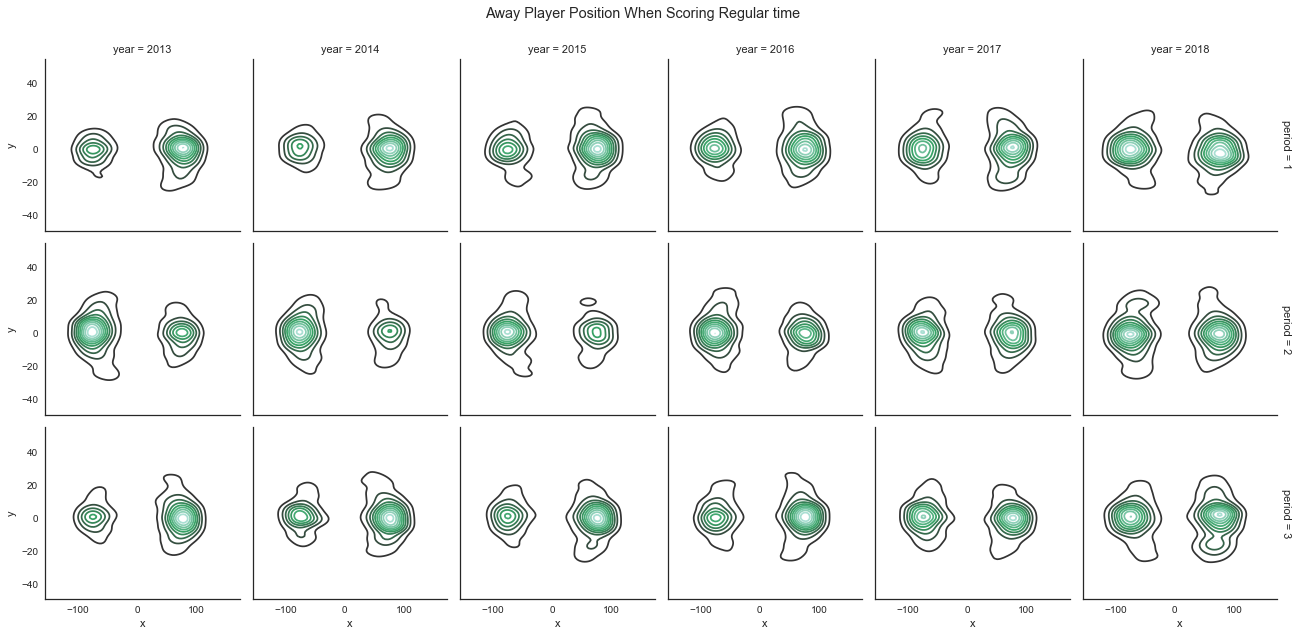

In [26]:
#Let's look at where all the Goals have occurred on the ice FOR AWAY TEAM
away_reg_time = away_game_plays_goals[game_plays_goals['period'] <=3]

#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
g = sns.FacetGrid(away_reg_time, col = "year", row = 'period', margin_titles=True)
g.map(sns.kdeplot, 'x', 'y')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Away Player Position When Scoring Regular time')
pass

In [27]:
who

away_game_plays_goals	 away_reg_time	 cols	 crosby_goals	 crosby_ot_goals	 g	 game	 game_goalie_stats	 game_plays_goals	 
game_plays_hits	 game_plays_position	 game_skater_stats	 game_teams_stats	 goalie_team	 home_game_plays_goals	 home_reg_time	 img	 imgplot	 
mpimg	 np	 pd	 player_info	 plt	 re	 reg_time	 reg_time_crosby	 reg_time_crosby_away	 
reg_time_crosby_home	 season_scores	 skater_team	 sns	 team_info	 


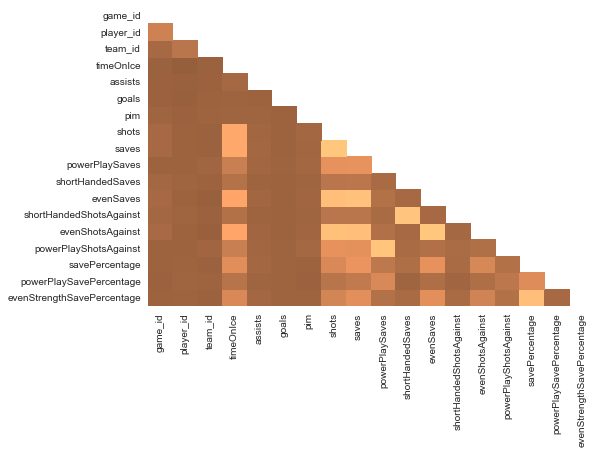

In [28]:
#Goalie Stats Correlation Heatmap
c = game_goalie_stats.corr()
mask = np.ones_like(c)
mask = np.triu(mask)
sns.set(style = 'white')
sns.heatmap(c, cmap = 'copper', mask=mask, cbar=False)

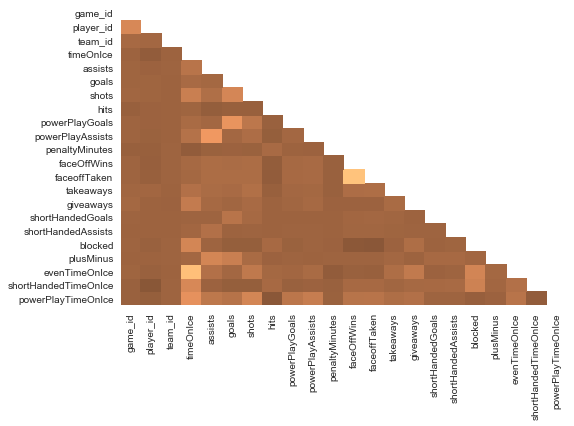

In [29]:
#Player Stats Correlation Heatmap
c = game_skater_stats.corr()
mask = np.ones_like(c)
mask = np.triu(mask)
sns.set(style = 'white')
sns.heatmap(c, cmap = 'copper', mask=mask, cbar=False)

In [ ]:
#ax = sns.heatmap((game_plays_goals['x'], game_plays_goals['y']))

KeyboardInterrupt: 

In [2]:
#Let's see what variables are out here
%who

Interactive namespace is empty.


In [ ]:
#Where do hits occur on the ice
ax = sns.jointplot('x', 'y', data=game_plays_position, kind="hex")
ax.set_title('Player Position When Hitting')
ax.set_ylabel('Y coordinate')
ax.set_xlabel('X coordinate')

In [ ]:
#How about goals?
sns.jointplot('x', 'y', data=game_plays_goals, kind="hex")

The above graph is assymetrical along the y axis.  It would appear that there is some bias in terms of handedness?

In [ ]:
#Test this line
#sns.jointplot('x', 'y', data=game_plays_position, kind="kde")

# This linke has some nice visualizations we could try 
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

Heat maps:

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
#Just plot 1000 points because it takes forever
#This visualization style could be good but I can't get this to work correctly
g = sns.heatmap([game_plays_position[:1000]['x'], game_plays_position[:1000]['y']])

In [ ]:
#Not working correctly

#g = sns.JointGrid('x','y', data = game_plays_position)
#g = g.plot_joint(plt.scatter, color='0.5', edgecolor='white')
#g = g.plot_joint(sns.kdeplot, zorder=0, n_levels=6)
#g = g.plot_marginals(sns.kdeplot, shades=True)

In [ ]:
skater_team.groupby('teamName').mean()['shots']

In [ ]:
#Group by team
by_team = skater_team.groupby('teamName').mean()
plt.hist(skater_team.groupby('teamName').mean()['shots'])#.plot(legend=True)

In [ ]:
g = sns.stripplot(x='nationality', y = 'shots', data=skater_team)

In [ ]:
g = sns.boxplot(x='shots', y='nationality', data=skater_team)

In [ ]:
#Group skaters by nationality
by_country = skater_team.groupby('nationality').mean()
skater_team.groupby('nationality').mean()['shots'].plot(legend=True)


In [ ]:
plt.scatter(by_country['shots'],by_country['goals'])

In [ ]:
goalie_team.hist('powerPlaySaves')

In [ ]:
plt.scatter(goalie_team['shots'], goalie_team['saves'])

In [ ]:
game_goalie_stats.head()